#Experiment 2 : Social Network Analysis

In this prcatice we will use NetworkX. NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
You can see the full documentation of NetworkX  [HERE](https://networkx.github.io/documentation/stable/)


In [ ]:
# Import Library
import networkx as nx
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat

--2022-03-30 07:21:54--  http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat
Resolving vlado.fmf.uni-lj.si (vlado.fmf.uni-lj.si)... 193.2.67.80
Connecting to vlado.fmf.uni-lj.si (vlado.fmf.uni-lj.si)|193.2.67.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4849 (4.7K) [text/plain]
Saving to: ‘zachary.dat’

zachary.dat         100%[===================>]   4.74K  --.-KB/s    in 0.1s    

2022-03-30 07:21:54 (40.7 KB/s) - ‘zachary.dat’ saved [4849/4849]



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/zachary.dat', sep=',')
df.head()

Mounted at /content/gdrive


,DL
0,N=34 NM=2
1,FORMAT = FULLMATRIX DIAGONAL PRESENT
2,LEVEL LABELS:
3,ZACHE
4,ZACHC


In [ ]:
#df.tail
#df.head()
#df.describe()
#df.shape
#df.dtypes

## Import Dataset

We will use [Zachary's karate Club Dataset](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) that avaiable in [NetworkX](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.social.karate_club_graph.html#networkx.generators.social.karate_club_graph)

#nodes: 34 and #edges: 78


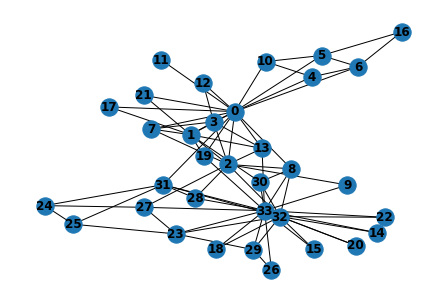

In [ ]:
# Import Dataset
G = nx.karate_club_graph()
print('#nodes:', len(G.nodes()), 'and', '#edges:', len(G.edges()))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

The data was collected from the members of a university karate club by Wayne Zachary in 1977.
Each node represents a member of the club.
Each edge represents a tie between two members of the club.
The network is undirected and unweighted. There are 34 members of a university karate club and 78 interactions between members. 

## Show Nodes and Edges

In [ ]:
# Show the nodes
nx.nodes(G)
#list(G.nodes)

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [ ]:
# Show the edges
nx.edges(G)
#list(G.edges)

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

## Drawing/Visualization

Drawing/Visualization documentation: https://networkx.github.io/documentation/stable/reference/drawing.html

[1, 8, 32, 33]

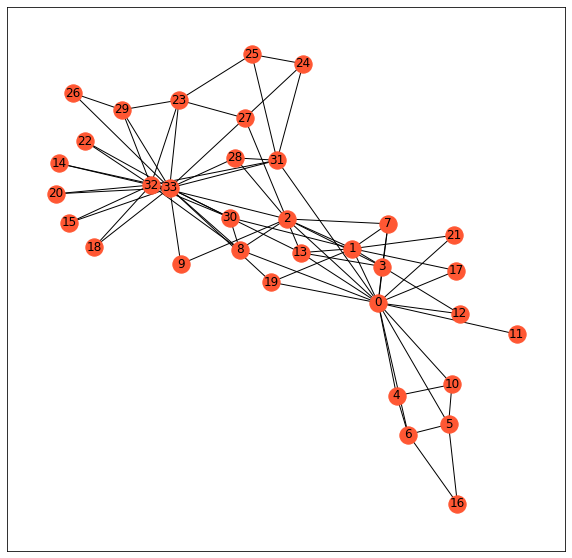

In [ ]:
# Drawing
import matplotlib.pyplot as plt
layout = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(10,10))
plt.axis("on") 
nx.draw_networkx(G, layout, with_labels=True, node_color = '#FF5733' )
list(G.adj[30])

## Graph Density and Matrix

Closer to 0 ,  the interactions between karate members are more distant. Closer to 1 ,  the interactions are denser.

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]
Graph with 34 nodes and 78 edges


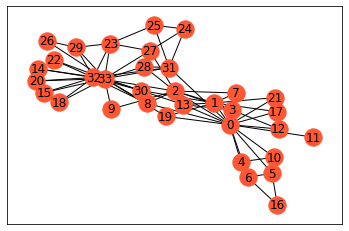

In [ ]:
# Graph Density
nx.density(G)
nx.draw_networkx(G, layout, with_labels=True, node_color = '#FF5733' )
A=nx.to_numpy_matrix(G) # Incidence matrix A.shape
print(A)
H=nx.from_numpy_matrix(A)
print(H)


## Average Shortest Path Lenght

Average distance among karate members.

In [ ]:
# Average Shortest Path Lenght
nx.average_shortest_path_length(G)
#Graph=nx.from_numpy_matrix('numpy_adj_matrix.npy')

2.408199643493761

## Network Diameter

Maximum distance between two farthest members.

In [ ]:
nx.diameter(G)

5

## Degree

In [ ]:
# Show node degree
nx.degree(G)

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [ ]:
# Sorted from the highest Degree
sorted(nx.degree(G), key=lambda x: x[1], reverse=True)

[(33, 17),
 (0, 16),
 (32, 12),
 (2, 10),
 (1, 9),
 (3, 6),
 (31, 6),
 (8, 5),
 (13, 5),
 (23, 5),
 (5, 4),
 (6, 4),
 (7, 4),
 (27, 4),
 (29, 4),
 (30, 4),
 (4, 3),
 (10, 3),
 (19, 3),
 (24, 3),
 (25, 3),
 (28, 3),
 (9, 2),
 (12, 2),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (20, 2),
 (21, 2),
 (22, 2),
 (26, 2),
 (11, 1)]

## Betweenness Centrality

In [ ]:
# Calculate betweeness centrality and sort from the highest value
sorted(nx.betweenness_centrality(G, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374)]

## Closeness Centrality

In [ ]:
# Calculate closeness centrality and sort from the highest value
sorted(nx.closeness_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625),
 (13, 0.515625),
 (32, 0.515625),
 (19, 0.5),
 (1, 0.4852941176470588),
 (3, 0.4647887323943662)]